In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical

In [9]:
#os.chdir("../input/sign-language-mnist/")
train = np.genfromtxt("sign_mnist_train.csv", delimiter = ",")
test = np.genfromtxt("sign_mnist_test.csv", delimiter = ",")

In [11]:
from keras.utils import to_categorical
Y_train = train[1:,0].reshape(27455,1)
Y_train = to_categorical(Y_train)
Y_test = test[1:,0].reshape(7172,1)
Y_test = to_categorical(Y_test)
X_train = train[1:,1:].reshape(27455,28,28,1)
X_test = test[1:,1:].reshape(7172,28,28,1)

print("Number of training examples = " + str(X_train.shape[0]))
print("Number of test examples = " + str(X_test.shape[0]))
print("Shape of X_train = " + str(X_train.shape))
print("Shape of X_test = " + str(X_test.shape))
print("Shape of Y_train = " + str(Y_train.shape))
print("Shape of Y_test = " + str(Y_test.shape))

Number of training examples = 27455
Number of test examples = 7172
Shape of X_train = (27455, 28, 28, 1)
Shape of X_test = (7172, 28, 28, 1)
Shape of Y_train = (27455, 25)
Shape of Y_test = (7172, 25)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


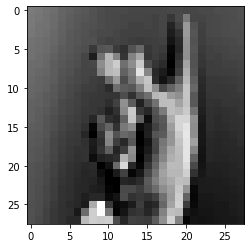

In [24]:
# Check any example from the training set by changing value of m

Image = train[1:,1:].reshape(27455,28,28)
m = 555
plt.subplot(1,1,1)
plt.grid(False)
print(Y_train[m])
plt.imshow(Image[m], cmap=plt.cm.binary)

In [13]:
X_train, X_test = X_train / 255, X_test / 255

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [23]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=4, 
                    validation_data=(X_test, Y_test))

Epoch 1/4
858/858 [==============================] - 18s 21ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.4421 - val_accuracy: 0.9267
Epoch 2/4
858/858 [==============================] - 17s 20ms/step - loss: 2.4692e-04 - accuracy: 1.0000 - val_loss: 0.4704 - val_accuracy: 0.9347
Epoch 3/4
858/858 [==============================] - 18s 21ms/step - loss: 1.1838e-04 - accuracy: 1.0000 - val_loss: 0.4889 - val_accuracy: 0.9352
Epoch 4/4
858/858 [==============================] - 16s 19ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.4716 - val_accuracy: 0.9202
